In [13]:
# Importing libraries

import csv
import os
import pydotplus
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import math
from sklearn.tree import export_graphviz
from io import StringIO
import io
import imageio
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve

In [2]:
# Label Encoders to convert each qualitative variable into a quantitave variable

le = preprocessing.LabelEncoder()
le_gender = preprocessing.LabelEncoder()
le_rvsp = preprocessing.LabelEncoder()
le_rv_function = preprocessing.LabelEncoder()
le_size = preprocessing.LabelEncoder()
le_intervention = preprocessing.LabelEncoder()
le_sloe = preprocessing.LabelEncoder()

In [3]:
# Establishing Random Forest Classifier and MinMaxScalar to normalize all features

model = RandomForestClassifier(n_estimators=10)
scaler = MinMaxScaler(feature_range=(0, 1))

In [4]:
# Function to parse data from csv into a list

def get_data(filename):
    with open(filename, "rt", encoding='utf8') as f:
        reader = csv.reader(f)
        next(reader, None)
        file = csv.reader(f)
        temp = list(file)
    return temp

In [5]:
# Function to output list to csv

def to_csv(filename, nested_list):
    with open(filename, 'w', newline='\n', encoding='utf-8'):
        output_array = np.array(nested_list)
        np.savetxt(filename, output_array, delimiter=",")

In [6]:
# Function to remove 'N/A' From feature columns and replace with mean

def clean_and_mean(lists):
    lists = lists.replace('N/A', np.NaN)
    num_lists = lists.apply(pd.to_numeric, errors='coerce')
    cleaned_lists = num_lists.apply(lambda x: x.fillna(x.mean()))
    return(np.array(cleaned_lists))

In [7]:
# Function to output random forest decision trees into a visual graph using graphviz

def show_tree(decisionTree, file_path, cols, x, y):
    dotfile = io.StringIO()
    export_graphviz(decisionTree, out_file=dotfile, feature_names=cols)
    pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    i = imageio.imread(file_path)
    plt.figure(figsize = (x,y))
    plt.imshow(i)

In [8]:
# Establishing feature columns and associated headers

included_cols = [3, 4, 5, 6, 7, 8, 9, 10, 19,
    20, 21, 22, 23, 25, 26, 27, 28, 29, 30]

cols = ['Sex (M/F)',
                'BMI',
                'DM (1/0)',
                'HTN (1/0)',
                'COPD (1/0)',
                'CTEPH (1/0)',
                'ESRD (1/0)',
                'Hx of Malignancy (1/0)',
                'Original EDA  (cm2)',
                'Original ESA (cm2)',
                ' Original FAC (%)',
                'Original EndoGLS (%)',
                'Size/Location of Embolus',
                'RVSP',
                'RV Size',
                'RV Function',
                'McConnell\'s Sign',
                'TR Velocity',
                'Intervention']

In [9]:
# Function to seperate features and labels. The label_column defines the expected output in terms of suprevised learning. 
# In this example, column 42 is used which is 'Death Within 1 Year'

def seperate_features_and_labels(file, label_column):
    features = []
    labels = []
    for row in file:
        filt_row = list(row[i] for i in included_cols)
        features.append(filt_row)
        labels.append(row[label_column])

    labels_encoded = le.fit_transform(labels)

    # print(len(cols))
    df_features = pd.DataFrame(features, columns=cols)
    df_features['Sex (M/F)'] = le_gender.fit_transform(df_features['Sex (M/F)'])
    df_features['RVSP'] = le_rvsp.fit_transform(df_features['RVSP'])
    df_features['RV Size'] = le_size.fit_transform(df_features['RV Size'])
    df_features['RV Function'] = le_rv_function.fit_transform(
        df_features['RV Function'])
    df_features['Intervention'] = le_intervention.fit_transform(
        df_features['Intervention'])
    df_features['Size/Location of Embolus'] = le_sloe.fit_transform(
        df_features['Size/Location of Embolus'])

    df_features.to_csv(r'df_features.csv')

    cleaned_features = scaler.fit_transform(clean_and_mean((df_features)))
    return(cleaned_features, labels_encoded)

In [10]:
# Passing data file, seperating features and labels and outputting the head

data = get_data('scar_data.csv')
f, l = seperate_features_and_labels(data, 42)

d_f = pd.DataFrame(data=f, columns=cols)
d_f.head(20)

,Sex (M/F),BMI,DM (1/0),HTN (1/0),COPD (1/0),CTEPH (1/0),ESRD (1/0),Hx of Malignancy (1/0),Original EDA (cm2),Original ESA (cm2),Original FAC (%),Original EndoGLS (%),Size/Location of Embolus,RVSP,RV Size,RV Function,McConnell's Sign,TR Velocity,Intervention
0,0.0,0.361929,0.0,1.0,0.0,1.0,0.0,0.0,0.280124,0.000779,0.390293,0.543733,0.5,1.000000,0.333333,0.75,0.0,0.819284,0.5
1,0.0,0.119293,0.0,1.0,1.0,1.0,0.0,1.0,0.238176,0.000808,0.222667,0.702885,0.5,0.131579,0.666667,0.00,0.0,0.412948,0.5
2,0.0,0.142366,1.0,1.0,0.0,0.0,0.0,0.0,0.190315,0.000443,0.671754,0.719567,0.0,0.789474,0.000000,0.25,0.0,0.778237,0.5
3,0.0,0.243004,1.0,1.0,0.0,0.0,0.0,0.0,0.455236,0.001180,0.299725,0.639315,0.5,0.368421,0.333333,0.50,0.0,0.566391,0.5
4,0.0,0.169980,0.0,1.0,0.0,1.0,0.0,0.0,1.000000,0.001354,0.955467,0.182597,0.5,1.000000,1.000000,1.00,0.0,0.571157,0.5
5,1.0,0.100638,0.0,0.0,0.0,0.0,1.0,0.0,0.016329,0.000132,0.746310,0.343553,0.5,1.000000,0.000000,1.00,0.0,0.571157,0.5
6,1.0,0.168630,1.0,0.0,0.0,0.0,0.0,0.0,0.798986,0.002033,0.140105,0.809288,0.5,0.447368,1.000000,1.00,0.0,0.571157,0.0
7,1.0,0.103093,0.0,0.0,0.0,0.0,0.0,0.0,0.221847,0.000915,0.000000,1.000000,0.0,1.000000,0.666667,0.50,0.0,0.579339,0.5
8,1.0,0.090820,1.0,1.0,0.0,0.0,0.0,1.0,0.262387,0.000787,0.328496,0.675383,0.5,0.710526,0.000000,0.25,0.0,0.787328,0.5
9,1.0,0.008959,0.0,1.0,0.0,0.0,0.0,1.0,0.274493,0.000692,0.502627,0.417944,0.5,1.000000,1.000000,1.00,0.0,0.245455,0.5


In [19]:
# 10-Fold Cross Validation. Data is split randomly ten times into test and train data respectively.
# The error is outputted and the mean of the errors is outputted.

scores = []
splits = 10
cv = KFold(n_splits=splits, shuffle=True)
for train_index, test_index in cv.split(f):

    x_train, x_test, y_train, y_test = f[train_index], f[test_index], l[train_index], l[test_index]
    model.fit(x_train, y_train)

    scores.append(model.score(x_test, y_test))
print(f'The mean score is: {np.mean(scores)}')

The mean score is: 0.875


In [20]:
# Export as dot file

estimator = model.estimators_[5]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = cols,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook

from IPython.display import Image
Image(filename = 'tree.png')

[[1.  0. ]
 [0.7 0.3]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]]


c:\users\nickk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\ranking.py:528: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


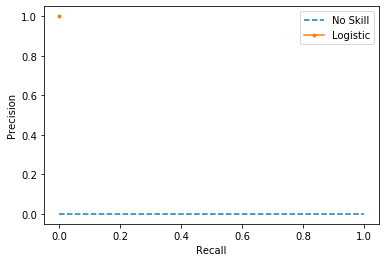

In [23]:
# predict probabilities
lr_probs = model.predict_proba(x_test)
print(lr_probs)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# predict class values
yhat = model.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()